In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MNIST 데이터 셋을 다운로드 하고 튜플 형태로 train, test 셋으로 분리한다.

In [20]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [21]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
y_train.shape

(60000,)

In [23]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Unique 함수를 통해 전체 클래스 수가 10개라는 것을 확인할 수 있다.

이후 255로 나누어 정규화를 해준다.

In [24]:
X_train, X_test = X_train / 255., X_test / 255. 

In [25]:
np.max(X_train)

1.0

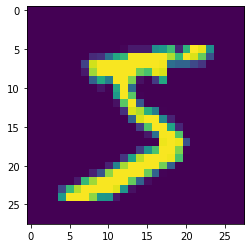

In [26]:
plt.imshow(X_train[0, :, :])

모델 구조를 정의하고 컴파일하여 훈련할 준비를 한다.

컴파일 시 from logits = True는, 마지막 Dense layer를 거칠 때 softmax를 적용하지 않았기 때문에 True로 전달해준다.

In [38]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 2, padding='same', activation='relu', input_shape = (28, 28, 1)),
  tf.keras.layers.MaxPooling2D(), # 16 x 16
  tf.keras.layers.Conv2D(64, 2, padding='same', activation='relu'), 
  tf.keras.layers.MaxPooling2D(), # 8 x 8 
  tf.keras.layers.Conv2D(128, 2, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(), # 4 x 4
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [39]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 128)         32896     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 128)       

In [42]:
history = model.fit(X_train, y_train, batch_size=128, epochs = 2, validation_split=0.2, verbose=1)

Epoch 1/2
375/375 [==============================] - 63s 168ms/step - loss: 0.0953 - accuracy: 0.9700 - val_loss: 0.0627 - val_accuracy: 0.9803
Epoch 2/2
375/375 [==============================] - 54s 144ms/step - loss: 0.0593 - accuracy: 0.9815 - val_loss: 0.0536 - val_accuracy: 0.9838


In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0480 - accuracy: 0.9845


[0.048001743853092194, 0.984499990940094]

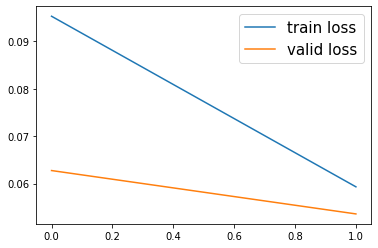

In [47]:
x = list(range(2))
plt.plot(x, history.history['loss'], label='train loss', )
plt.plot(x, history.history['val_loss'], label='valid loss')
plt.legend(['train loss', 'valid loss'], fontsize=15)
plt.show()

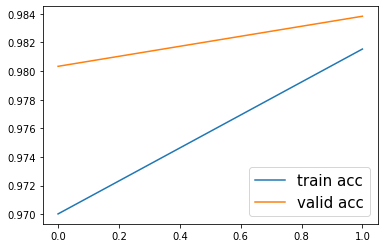

In [49]:
x = list(range(2))
plt.plot(x, history.history['accuracy'], label='train acc', )
plt.plot(x, history.history['val_accuracy'], label='valid acc')
plt.legend(['train acc', 'valid acc'], fontsize=15)
plt.show()